# Pymaceuticals Inc.
***

### Analysis
 - The Drug Regimens with the most consistent results are: Capomulin, Ramicane, Infubinol, and Ceftamin as they have the lowest standard deviation/variance, hence, we will be considering these 4 drugs for further analysis
 - The distribution of female versus male mice is equal
 - Capomulin, Ramicane has the most number of observed mouse timepoints
 - When it comes to the final tumor volume measurement, both Capomulin and Ramicane have the most promising results
 - We can notice a moderate to high positive correlation between the weight and the average tumor volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"])
mouse_study_df = mouse_study_df.reset_index(drop=True)

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_number = mouse_study_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = pd.unique(mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"])
mice_dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == mice_dup[0]]
mice_dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df.drop(mouse_study_df[mouse_study_df["Mouse ID"]==mice_dup[0]].index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
mice_number = cleaned_df["Mouse ID"].nunique()
mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
cdf_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
cdf_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
cdf_variance = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
cdf_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
cdf_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = {"Mean Tumor Volume": cdf_mean, "Median Tumor Volume": cdf_median, "Tumor Volume Variance": cdf_variance,
                "Tumor Volume Std. Dev.": cdf_std, "Tumor Volume Std. Err.": cdf_sem}
stats_df = pd.DataFrame(summary_stats)
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
sum_stats_agg = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
sum_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

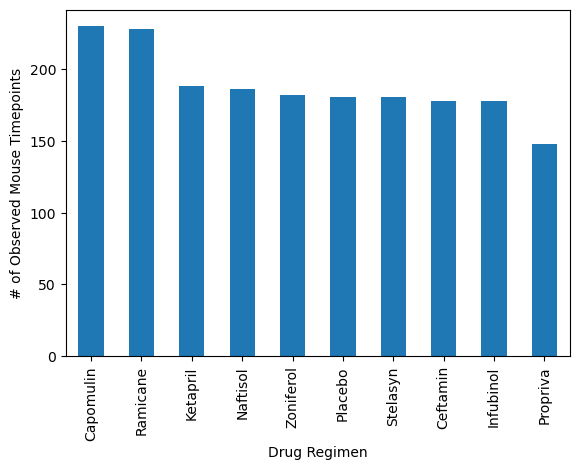

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_regimen = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending = False)
count_per_regimen.plot(kind="bar", figsize=(6.5,4.5))
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

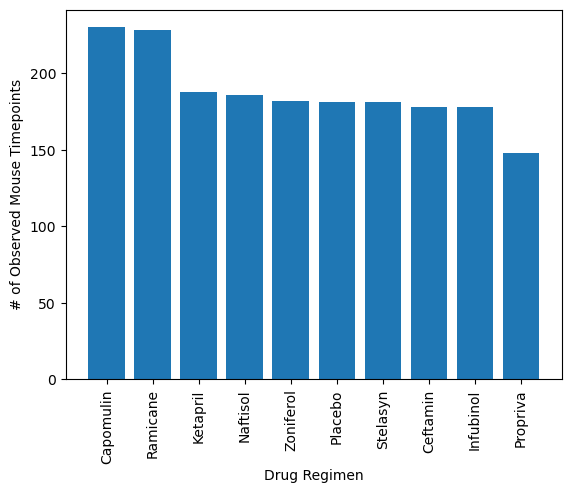

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_per_regimen = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending = False)
x_axis = count_per_regimen.index.tolist()
y_axis = [count for count in count_per_regimen]
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


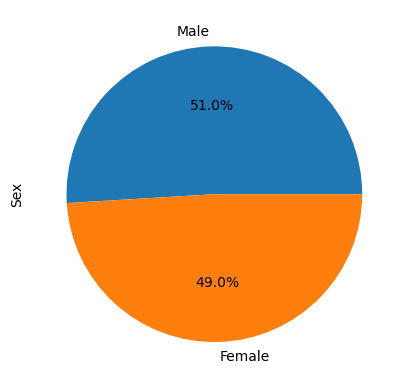

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_count = cleaned_df.groupby("Sex")["Mouse ID"].count().sort_values(ascending = False)
mouse_sex_count.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

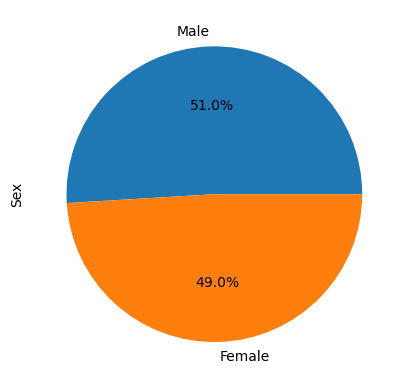

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_count = cleaned_df.groupby("Sex")["Mouse ID"].count().sort_values(ascending = False)
mouse_sex = mouse_sex_count.index.tolist()
mouse_count = [count for count in mouse_sex_count]
plt.pie(mouse_count, labels=mouse_sex, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df = cleaned_df.loc[cleaned_df["Drug Regimen"].isin(treatment)]

# Start by getting the last (greatest) timepoint for each mouse
reg_great_tp_df = regimen_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_data = pd.merge(reg_great_tp_df, regimen_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]], on = ["Mouse ID", "Timepoint"], how = "inner")
tumor_vol_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


In [14]:
# Create a list of the last timepoint's tumor volume for each treatment
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

capomulin_tumor_vol = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"]=="Capomulin", "Tumor Volume (mm3)"].tolist()
capomulin_tumor_vol.sort
ramicane_tumor_vol = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"]=="Ramicane", "Tumor Volume (mm3)"].tolist()
ramicane_tumor_vol.sort()
infubinol_tumor_vol = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"]=="Infubinol", "Tumor Volume (mm3)"].tolist()
infubinol_tumor_vol.sort()
ceftamin_tumor_vol = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"]=="Ceftamin", "Tumor Volume (mm3)"].tolist()
ceftamin_tumor_vol.sort()

# Use the lists to create a DataFrame
regimen_tumor_vol_df = pd.DataFrame({"Capomulin": capomulin_tumor_vol, "Ramicane": ramicane_tumor_vol, 
                                     "Infubinol": infubinol_tumor_vol, "Ceftamin": ceftamin_tumor_vol})


# Calcualte IQR, lower bound and upper bound for each treatment
q1_regimen = regimen_tumor_vol_df.quantile(0.25)
q3_regimen = regimen_tumor_vol_df.quantile(0.75)
iqr = q3_regimen-q1_regimen
lower_bound_regimen = q1_regimen - (1.5*iqr)
upper_bound_regimen = q3_regimen + (1.5*iqr)


# Create a list of outliers for each treatment and print results as required
capomulin_outliers = regimen_tumor_vol_df.loc[(regimen_tumor_vol_df["Capomulin"] > upper_bound_regimen["Capomulin"]) | 
                                              (regimen_tumor_vol_df["Capomulin"] < lower_bound_regimen["Capomulin"]), "Capomulin"]
ramicane_outliers = regimen_tumor_vol_df.loc[(regimen_tumor_vol_df["Ramicane"] > upper_bound_regimen["Ramicane"]) | 
                                              (regimen_tumor_vol_df["Ramicane"] < lower_bound_regimen["Ramicane"]), "Ramicane"]
infubinol_outliers = regimen_tumor_vol_df.loc[(regimen_tumor_vol_df["Infubinol"] > upper_bound_regimen["Infubinol"]) | 
                                              (regimen_tumor_vol_df["Infubinol"] < lower_bound_regimen["Infubinol"]), "Infubinol"]
ceftamin_outliers = regimen_tumor_vol_df.loc[(regimen_tumor_vol_df["Ceftamin"] > upper_bound_regimen["Ceftamin"]) | 
                                              (regimen_tumor_vol_df["Ceftamin"] < lower_bound_regimen["Ceftamin"]), "Ceftamin"]

print(f"Capomulin's potential outliers: {capomulin_outliers}")
print(f"Ramicane's potential outliers: {ramicane_outliers}")
print(f"Infubinol's potential outliers: {infubinol_outliers}")
print(f"Ceftamin's potential outliers: {ceftamin_outliers}")

Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


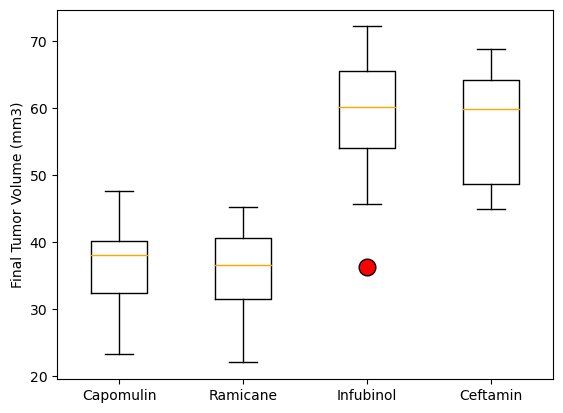

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
regimen_tumor_vol_df.plot(kind="box", color=dict(boxes="black", whiskers="black", caps="black", medians="orange"), 
                          flierprops=dict(markersize=12, markerfacecolor="red"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

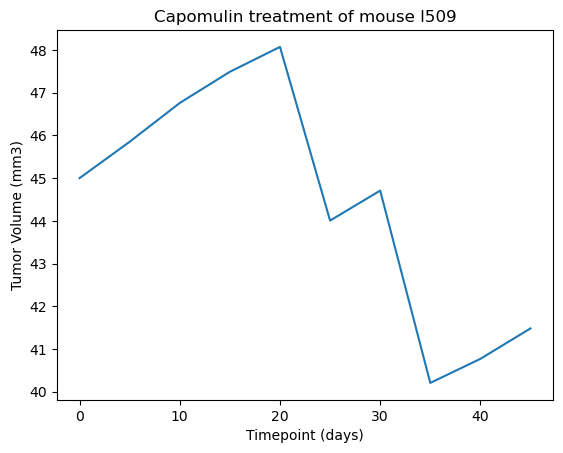

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_tp_tumor_vol = cleaned_df.loc[cleaned_df["Mouse ID"]=="l509", ("Mouse ID", "Timepoint", "Tumor Volume (mm3)")]
x_axis = list(mouse_tp_tumor_vol["Timepoint"])
y_axis = list(mouse_tp_tumor_vol["Tumor Volume (mm3)"])
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

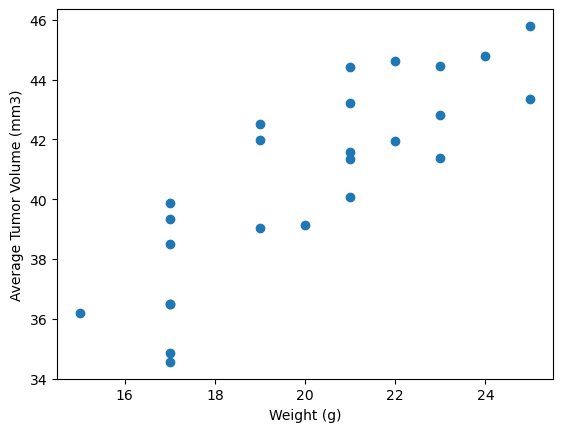

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df[cleaned_df["Drug Regimen"]=="Capomulin"]
weight_vs_avg_tv = capomulin_df.groupby(["Weight (g)", "Mouse ID"])["Tumor Volume (mm3)"].mean().to_frame()
weight_vs_avg_tv = weight_vs_avg_tv.reset_index()
x_axis_scatter = weight_vs_avg_tv["Weight (g)"]
y_axis_scatter = weight_vs_avg_tv["Tumor Volume (mm3)"]
plt.scatter(x=x_axis_scatter, y=y_axis_scatter)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


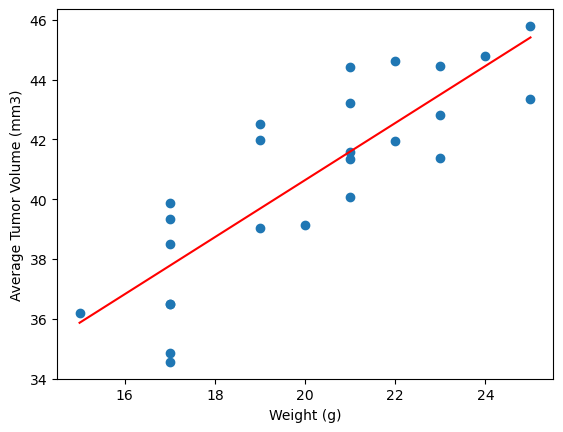

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_axis_scatter = weight_vs_avg_tv["Weight (g)"]
y_axis_scatter = weight_vs_avg_tv["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_axis_scatter, y_axis_scatter)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
plt.scatter(x=x_axis_scatter, y=y_axis_scatter)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()